In [1]:
import pickle
import time
from collections import namedtuple
from datetime import datetime, timedelta

import pandas as pd
import requests

import matplotlib.pyplot as plt
from pyprind import ProgBar

%matplotlib inline

In [2]:
API_KEY = '9b47f685a716d06d'
BASE_URL = 'http://api.wunderground.com/api/{}/history_{}/q/TX/Round_Rock.json'

In [2]:
features = [
    "date", "meantempm", "meandewptm", "meanpressurem", "maxhumidity",
    "minhumidity", "maxtempm", "mintempm", "maxdewptm", "mindewptm",
    "maxpressurem", "minpressurem", "precipm"
]
DailySummary = namedtuple('DailySummary', features)

In [4]:
def extract_weather_data(url, api_key, target_date, days):
    """Call Wunderground API to extract weather data."""
    records = []
    bar = ProgBar(days)
    for _ in range(days):
        request = BASE_URL.format(API_KEY, target_date.strftime('%Y%m%d'))
        response = requests.get(request)
        if response.status_code == 200:
            data = response.json()['history']['dailysummary'][0]
            records.append(DailySummary(
                date=target_date,
                meantempm=data['meantempm'],
                meandewptm=data['meandewptm'],
                meanpressurem=data['meanpressurem'],
                maxhumidity=data['maxhumidity'],
                minhumidity=data['minhumidity'],
                maxtempm=data['maxtempm'],
                mintempm=data['mintempm'],
                maxdewptm=data['maxdewptm'],
                mindewptm=data['mindewptm'],
                maxpressurem=data['maxpressurem'],
                minpressurem=data['minpressurem'],
                precipm=data['precipm']))
        time.sleep(6)
        bar.update()
        target_date += timedelta(days=1)
    return records

In [5]:
# Do not run this cell when collecting data on day 2
def get_target_date():
    """Return target date 1000 days prior to current date."""
    current_date = datetime.now()
    target_date = current_date - timedelta(days=1000)
    return target_date

target_date = get_target_date()

In [6]:
records = extract_weather_data(BASE_URL, API_KEY, target_date, 100)

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:10:50


In [29]:
# Look at first five records
records[900:905]

[DailySummary(date=datetime.datetime(2018, 2, 17, 0, 0), meantempm='12', meandewptm='7', meanpressurem='1020', maxhumidity='100', minhumidity='58', maxtempm='15', mintempm='9', maxdewptm='10', mindewptm='5', maxpressurem='1022', minpressurem='1017', precipm='0.00'),
 DailySummary(date=datetime.datetime(2018, 2, 18, 0, 0), meantempm='17', meandewptm='14', meanpressurem='1017', maxhumidity='100', minhumidity='65', maxtempm='24', mintempm='10', maxdewptm='18', mindewptm='10', maxpressurem='1021', minpressurem='1013', precipm='0.00'),
 DailySummary(date=datetime.datetime(2018, 2, 19, 0, 0), meantempm='23', meandewptm='18', meanpressurem='1013', maxhumidity='100', minhumidity='54', maxtempm='27', mintempm='20', maxdewptm='20', mindewptm='17', maxpressurem='1014', minpressurem='1010', precipm='0.00'),
 DailySummary(date=datetime.datetime(2018, 2, 20, 0, 0), meantempm='22', meandewptm='21', meanpressurem='1012', maxhumidity='100', minhumidity='84', maxtempm='23', mintempm='21', maxdewptm='22'

In [30]:
len(records)

1000

In [24]:
# Inspect last record to date; next target date should be plus one day
records[-1]

DailySummary(date=datetime.datetime(2016, 10, 3, 0, 0), meantempm='24', meandewptm='18', meanpressurem='1013', maxhumidity='94', minhumidity='41', maxtempm='33', mintempm='17', maxdewptm='22', mindewptm='15', maxpressurem='1016', minpressurem='1011', precipm='0.00')

In [25]:
# set new target date based on date above plus one day
target_date = datetime(2016, 10, 4)

In [26]:
# run this 4 separate times after setting the target date
records += extract_weather_data(BASE_URL, API_KEY, target_date, 100)

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:11:14


In [29]:
# save records list
with open('records_pt1.pkl', 'wb') as f:
    pickle.dump(records, f)

In [5]:
# load records list - still need to run cells 1-4
with open('records_pt1.pkl', 'rb') as fp:
    records = pickle.load(fp)

In [26]:
# Inspect last record to date; next target date should be plus one day
records[-1]

DailySummary(date=datetime.datetime(2018, 2, 15, 0, 0), meantempm='20', meandewptm='19', meanpressurem='1019', maxhumidity='100', minhumidity='69', maxtempm='24', mintempm='17', maxdewptm='20', mindewptm='17', maxpressurem='1021', minpressurem='1016', precipm='0.00')

In [27]:
# set new target date based on date above plus one day
target_date = datetime(2018, 2, 16)

In [28]:
# run this 5 separate times after setting the target date
records += extract_weather_data(BASE_URL, API_KEY, target_date, 101)

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:10:56


In [31]:
with open('records_pt2.pkl', 'wb') as f:
    pickle.dump(records, f)

In [3]:
# load records list - still need to run cells 1 and 3
with open('records_pt2.pkl', 'rb') as fp:
    records = pickle.load(fp)

In [4]:
df = pd.DataFrame(records, columns=features).set_index('date')

In [5]:
tmp = df[['meantempm', 'meandewptm']].head(10)
tmp

,meantempm,meandewptm
date,,
2015-08-31 22:04:48.276078,28,19
2015-09-01 22:04:48.276078,27,21
2015-09-02 22:04:48.276078,27,19
2015-09-03 22:04:48.276078,28,21
2015-09-04 22:04:48.276078,29,22
2015-09-05 22:04:48.276078,29,23
2015-09-06 22:04:48.276078,30,22
2015-09-07 22:04:48.276078,29,22
2015-09-08 22:04:48.276078,30,22


In [6]:
# 1 day prior
N = 1

# target measurement of mean temperature
feature = 'meantempm'

# total number of rows
rows = tmp.shape[0]

# a list representing Nth prior measurements of feature
nth_prior_measurements = tmp[feature].shift(periods=N)

# makee a new column name of feature_N and add to DataFrame
col_name = f'{feature}_{N}'
tmp[col_name] = nth_prior_measurements
tmp

,meantempm,meandewptm,meantempm_1
date,,,
2015-08-31 22:04:48.276078,28,19,NaN
2015-09-01 22:04:48.276078,27,21,28
2015-09-02 22:04:48.276078,27,19,27
2015-09-03 22:04:48.276078,28,21,27
2015-09-04 22:04:48.276078,29,22,28
2015-09-05 22:04:48.276078,29,23,29
2015-09-06 22:04:48.276078,30,22,29
2015-09-07 22:04:48.276078,29,22,30
2015-09-08 22:04:48.276078,30,22,29


In [7]:
def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = df[feature].shift(periods=N)
    col_name = f'{feature}_{N}'
    df[col_name] = nth_prior_measurements

In [8]:
for feature in features:
    if feature != 'date':
        for N in range(1, 4):
            derive_nth_day_feature(df, feature, N)

In [9]:
df.columns

Index(['meantempm', 'meandewptm', 'meanpressurem', 'maxhumidity',
       'minhumidity', 'maxtempm', 'mintempm', 'maxdewptm', 'mindewptm',
       'maxpressurem', 'minpressurem', 'precipm', 'meantempm_1', 'meantempm_2',
       'meantempm_3', 'meandewptm_1', 'meandewptm_2', 'meandewptm_3',
       'meanpressurem_1', 'meanpressurem_2', 'meanpressurem_3',
       'maxhumidity_1', 'maxhumidity_2', 'maxhumidity_3', 'minhumidity_1',
       'minhumidity_2', 'minhumidity_3', 'maxtempm_1', 'maxtempm_2',
       'maxtempm_3', 'mintempm_1', 'mintempm_2', 'mintempm_3', 'maxdewptm_1',
       'maxdewptm_2', 'maxdewptm_3', 'mindewptm_1', 'mindewptm_2',
       'mindewptm_3', 'maxpressurem_1', 'maxpressurem_2', 'maxpressurem_3',
       'minpressurem_1', 'minpressurem_2', 'minpressurem_3', 'precipm_1',
       'precipm_2', 'precipm_3'],
      dtype='object')

In [10]:
# make list of original features without meantempm, mintempm, and maxtempm
to_remove = [feature
             for feature in features
             if feature not in ['meantempm', 'mintempm', 'maxtempm']]

# make a list of columns to keep
to_keep = [col for col in df.columns if col not in to_remove]

# select only the columns in to_keep and assign to df
df = df[to_keep]
df.columns

Index(['meantempm', 'maxtempm', 'mintempm', 'meantempm_1', 'meantempm_2',
       'meantempm_3', 'meandewptm_1', 'meandewptm_2', 'meandewptm_3',
       'meanpressurem_1', 'meanpressurem_2', 'meanpressurem_3',
       'maxhumidity_1', 'maxhumidity_2', 'maxhumidity_3', 'minhumidity_1',
       'minhumidity_2', 'minhumidity_3', 'maxtempm_1', 'maxtempm_2',
       'maxtempm_3', 'mintempm_1', 'mintempm_2', 'mintempm_3', 'maxdewptm_1',
       'maxdewptm_2', 'maxdewptm_3', 'mindewptm_1', 'mindewptm_2',
       'mindewptm_3', 'maxpressurem_1', 'maxpressurem_2', 'maxpressurem_3',
       'minpressurem_1', 'minpressurem_2', 'minpressurem_3', 'precipm_1',
       'precipm_2', 'precipm_3'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2015-08-31 22:04:48.276078 to 2018-05-27 00:00:00
Data columns (total 39 columns):
meantempm          1000 non-null object
maxtempm           1000 non-null object
mintempm           1000 non-null object
meantempm_1        999 non-null object
meantempm_2        998 non-null object
meantempm_3        997 non-null object
meandewptm_1       999 non-null object
meandewptm_2       998 non-null object
meandewptm_3       997 non-null object
meanpressurem_1    999 non-null object
meanpressurem_2    998 non-null object
meanpressurem_3    997 non-null object
maxhumidity_1      999 non-null object
maxhumidity_2      998 non-null object
maxhumidity_3      997 non-null object
minhumidity_1      999 non-null object
minhumidity_2      998 non-null object
minhumidity_3      997 non-null object
maxtempm_1         999 non-null object
maxtempm_2         998 non-null object
maxtempm_3         997 non-null object
mintempm_1         999 non-n

In [12]:
df = df.apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2015-08-31 22:04:48.276078 to 2018-05-27 00:00:00
Data columns (total 39 columns):
meantempm          998 non-null float64
maxtempm           998 non-null float64
mintempm           998 non-null float64
meantempm_1        997 non-null float64
meantempm_2        996 non-null float64
meantempm_3        995 non-null float64
meandewptm_1       997 non-null float64
meandewptm_2       996 non-null float64
meandewptm_3       995 non-null float64
meanpressurem_1    995 non-null float64
meanpressurem_2    994 non-null float64
meanpressurem_3    993 non-null float64
maxhumidity_1      997 non-null float64
maxhumidity_2      996 non-null float64
maxhumidity_3      995 non-null float64
minhumidity_1      997 non-null float64
minhumidity_2      996 non-null float64
minhumidity_3      995 non-null float64
maxtempm_1         997 non-null float64
maxtempm_2         996 non-null float64
maxtempm_3         995 non-null float64
mintempm_1

In [13]:
# Call describe on df and transpose it due to the large number of columns
spread = df.describe().T

# precalculate interquartile range for ease of use in next calculation
IQR = spread['75%'] - spread['25%']

# create an outliers column which is either 3 IQRs below the first quartile or
# 3 IQRs above the third quartile
spread['outliers'] = (spread['min'] <
                      (spread['25%'] -
                       (3 * IQR))) | (spread['max'] >
                                      (spread['75%'] + 3 * IQR))

# just display the features containing extreame outliers
spread.loc[spread.outliers, ]

,count,mean,std,min,25%,50%,75%,max,outliers
meanpressurem_1,995.0,1017.123618,5.770580,1001.0,1014.0,1016.0,1020.0,1040.00,True
meanpressurem_2,994.0,1017.130785,5.769053,1001.0,1014.0,1016.0,1020.0,1040.00,True
meanpressurem_3,993.0,1017.133938,5.771103,1001.0,1014.0,1016.0,1020.0,1040.00,True
maxhumidity_1,997.0,93.971916,10.856920,45.0,93.0,100.0,100.0,100.00,True
maxhumidity_2,996.0,93.965863,10.860691,45.0,93.0,100.0,100.0,100.00,True
maxhumidity_3,995.0,93.959799,10.864466,45.0,93.0,100.0,100.0,100.00,True
minpressurem_1,995.0,1014.302513,5.826459,996.0,1011.0,1014.0,1017.0,1038.00,True
minpressurem_2,994.0,1014.309859,5.824780,996.0,1011.0,1014.0,1017.0,1038.00,True
minpressurem_3,993.0,1014.313192,5.826766,996.0,1011.0,1014.0,1017.0,1038.00,True
precipm_1,999.0,1.408438,7.920031,0.0,0.0,0.0,0.0,131.57,True


In [16]:
# iterate over the precip columns
for precip_col in ['precipm_1', 'precipm_2', 'precipm_3']:
    # create a boolean array of values representing nans
    missing_vals = pd.isnull(df[precip_col])
    df[precip_col][missing_vals] = 0

In [17]:
df = df.dropna()

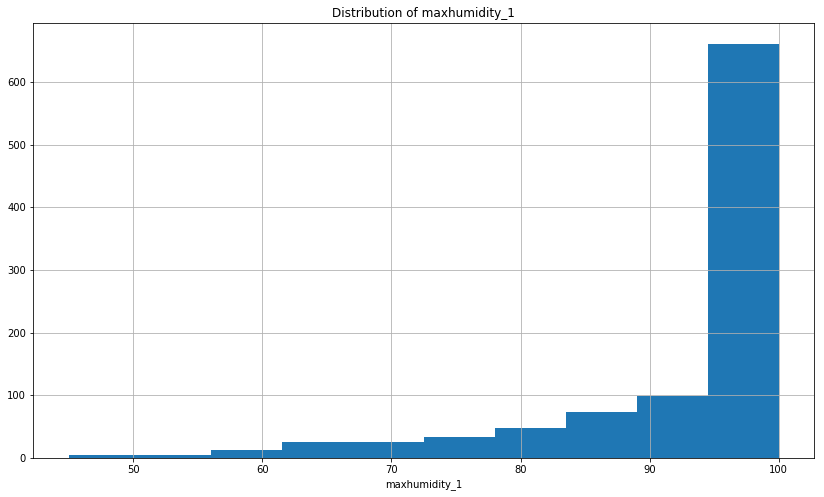

In [18]:
fig, ax = plt.subplots(figsize = (14, 8))
ax.hist(df.maxhumidity_1)
ax.set_title('Distribution of maxhumidity_1')
ax.set_xlabel('maxhumidity_1')
ax.grid()

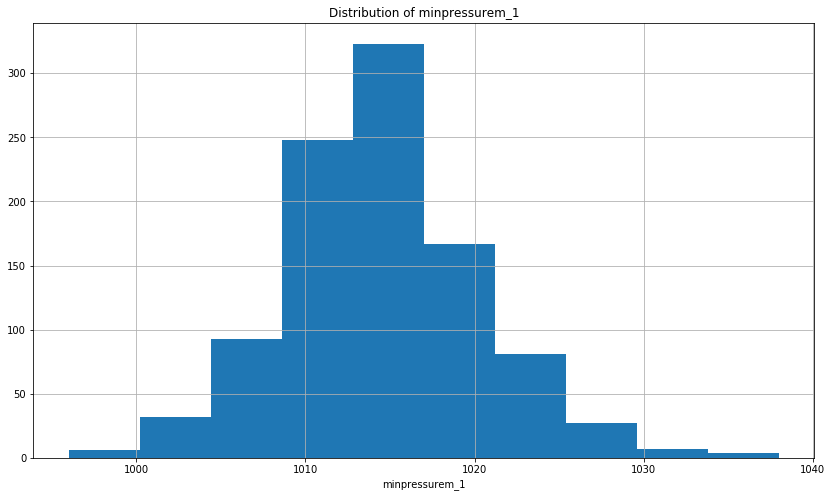

In [19]:
fig, ax = plt.subplots(figsize = (14, 8))
ax.hist(df.minpressurem_1)
ax.set_title('Distribution of minpressurem_1')
ax.set_xlabel('minpressurem_1')
ax.grid()

In [20]:
# import pickle
with open('end-part1_df.pkl', 'wb') as f:
    pickle.dump(df, f)